<a href="https://colab.research.google.com/github/almartcas/oooo/blob/main/PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PersistenceImages

  Created wheel for PersistenceImages: filename=PersistenceImages-1.3.3-cp37-none-any.whl size=10410 sha256=72c278dfe33fa9e82eb6d97dded7c9459baeb6e97793f1c90dfda1be71376e79
  Stored in directory: /root/.cache/pip/wheels/32/32/a3/4ebc58b37f466ea7eb4e88bb9a7cb118af84db9bc11c91ce69
Successfully built PersistenceImages


In [2]:
import PersistenceImages.persistence_images as pimg
import numpy as np

In [3]:
pers_imager = pimg.PersistenceImager(birth_range=(0, 1.5), pers_range=(-1,1))
print(pers_imager)

PersistenceImager object: 
  pixel size: 0.3 
  resolution: (4, 6) 
  birth range: (0, 1.5) 
  persistence range: (-1, 1) 
  weight: linear_ramp 
  kernel: bvncdf 
  weight parameters: {} 
  kernel parameters: {sigma: [[1. 0.]
 [0. 1.]]}


In [4]:
pers_dgm = np.array([[0.9822056 , 0.36493877],
       [0.50298887, 0.9267979 ],
       [0.23574578, 0.35935633],
       [0.55150194, 0.54188547],
       [0.31985077, 0.98478966],
       [0.90971858, 0.60986595],
       [0.66289489, 0.98271819],
       [0.76184398, 0.0173718 ]])
pers_img = pers_imager.transform(pers_dgm, skew=True)

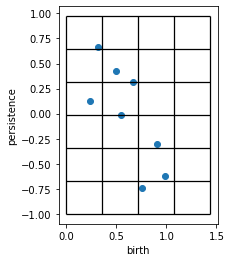

In [5]:
pers_imager.plot_diagram(pers_dgm, skew=True)

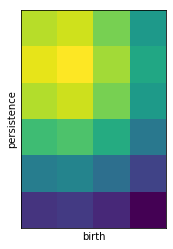

In [6]:
pers_imager.plot_image(pers_dgm, skew=True)

PI de resoluciones diferentes 

In [18]:
pers_imager.pixel_size = 0.7
print(pers_imager)

PersistenceImager object: 
  pixel size: 0.7 
  resolution: (2, 2) 
  birth range: (-0.3, 1.8) 
  persistence range: (-1.05, 1.05) 
  weight: linear_ramp 
  kernel: bvncdf 
  weight parameters: {} 
  kernel parameters: {sigma: [[1. 0.]
 [0. 1.]]}


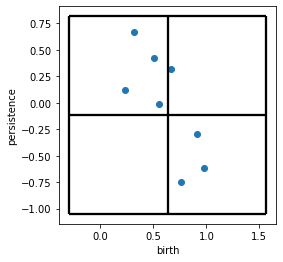

In [19]:
pers_imager.plot_diagram(pers_dgm, skew=True)

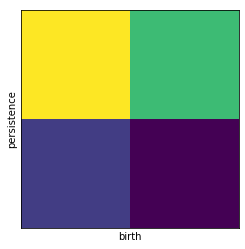

In [20]:
pers_imager.plot_image(pers_dgm, skew=True)

In [21]:
pers_imager.pixel_size = 0.03
print(pers_imager)

PersistenceImager object: 
  pixel size: 0.03 
  resolution: (70, 70) 
  birth range: (-0.3, 1.8) 
  persistence range: (-1.05, 1.05) 
  weight: linear_ramp 
  kernel: bvncdf 
  weight parameters: {} 
  kernel parameters: {sigma: [[1. 0.]
 [0. 1.]]}


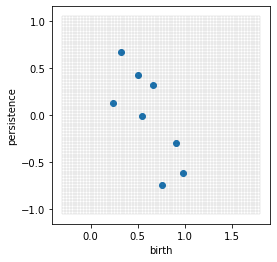

In [22]:
pers_imager.plot_diagram(pers_dgm, skew=True)

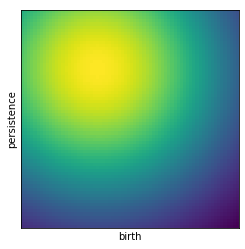

In [23]:
pers_imager.plot_image(pers_dgm, skew=True)